In [1]:
## here i am going to write the code for bats man workflow
## in the inout user will provide balls,runs,sixes,fours of the batsaman
## and in summary we will get strike rate,balls per boundary,boundary percentage as ouptut

In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict

In [3]:
load_dotenv()

True

In [4]:
class State(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int
    sr:float
    bpb:float
    bp:float
    summary:str

In [5]:
def calculate_sr(state:State) ->dict:
    runs = state["runs"]
    balls = state["balls"]
    sr = (runs/balls)*100
    return {"sr":sr}

In [6]:
def calculate_bpb(state:State) ->dict:
    runs = state["runs"]
    balls = state["balls"]
    sixes = state["sixes"]
    fours = state["fours"]


    bpb = (balls/(sixes+fours))
    return {"bpb":bpb}

In [7]:
def calculate_bp(state:State) ->dict:
    runs = state["runs"]
    balls = state["balls"]
    sixes = state["sixes"]
    fours = state["fours"]
    bp = (((4*fours) + (6*sixes))/runs)*100
    return {"bp":bp}

In [8]:
def get_summary(state:State) ->dict:
    sr = state["sr"]
    bpb = state["bpb"]
    bp = state["bp"]

    summary = f""""    
    The batsman performance is given as:
    Strike Rate : {sr}
    Balls Per Boundary: {bpb}
    Boundary Percentage: {bp}
                 """  
    return {"summary":summary}
    

In [9]:
graph = StateGraph(State)
graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bp",calculate_bp)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("get_summary",get_summary)
graph.add_edge(START,"calculate_sr")
graph.add_edge(START,"calculate_bpb")
graph.add_edge(START,"calculate_bp")
graph.add_edge("calculate_sr","get_summary")
graph.add_edge("calculate_bpb","get_summary")
graph.add_edge("calculate_bp","get_summary")
graph.add_edge("get_summary",END)
workflow = graph.compile()


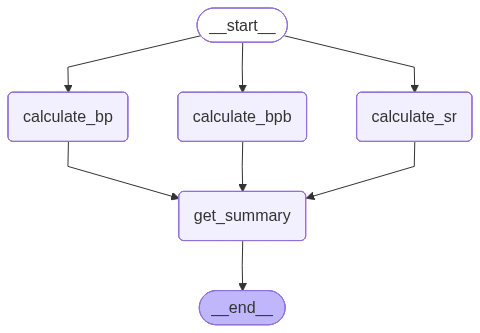

In [ ]:
workflow ## this is the architetcure of my workflow

In [ ]:
initial_state = {"runs":200,"balls":100,"sixes":5,"fours":8}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 200, 'balls': 100, 'fours': 8, 'sixes': 5, 'sr': 200.0, 'bpb': 7.6923076923076925, 'bp': 31.0, 'summary': '"    \n    The batsman performance is given as:\n    Strike Rate : 200.0\n    Balls Per Boundary: 7.6923076923076925\n    Boundary Percentage: 31.0\n                 '}


In [ ]:
final_state["summary"]

'"    \n    The batsman performance is given as:\n    Strike Rate : 200.0\n    Balls Per Boundary: 7.6923076923076925\n    Boundary Percentage: 31.0\n                 '